# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Banny Juanda
- **Email:** bannyjuanda@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?
- Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [71]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [72]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Missing value day

In [73]:
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicate data day

In [74]:
duplicated = day_df.duplicated()
print(f"Jumlah Duplikasi Data: {duplicated.sum()}")

Jumlah Duplikasi Data: 0


- Missing value data hour

In [75]:
missing_values_hour = hour_df.isnull().sum()
print(missing_values_hour)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicated data hour

In [76]:
duplicated_hour = hour_df.duplicated()
print(f"Jumlah Duplikasi Data: {duplicated_hour.sum()}")

Jumlah Duplikasi Data: 0


### Cleaning Data

In [77]:
day_df_cleaned = day_df.dropna()
print(f"Jumlah data setelah menghapus missing values di day_df: {day_df_cleaned.shape[0]}")

hour_df_cleaned = hour_df.dropna()
print(f"Jumlah data setelah menghapus missing values di hour_df: {hour_df_cleaned.shape[0]}")

Jumlah data setelah menghapus missing values di day_df: 731
Jumlah data setelah menghapus missing values di hour_df: 17379


## Exploratory Data Analysis (EDA)

### Explore `day_df_cleaned`

In [104]:
day_df_cleaned.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [105]:
day_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
102,103,2011-04-13,2,0,4,0,3,1,2,0.412500,0.417283,0.819167,0.250617,209,1953,2162
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
501,502,2012-05-16,2,1,5,0,3,1,1,0.636667,0.595975,0.697917,0.122512,991,6433,7424
156,157,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.600000,0.121896,673,3875,4548
442,443,2012-03-18,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207,3685,5892
100,101,2011-04-11,2,0,4,0,1,1,2,0.595652,0.565217,0.716956,0.324474,855,2493,3348
217,218,2011-08-06,3,0,8,0,6,0,2,0.716667,0.676154,0.755000,0.228250,1521,2773,4294
507,508,2012-05-22,2,1,5,0,2,1,2,0.615000,0.580825,0.765833,0.118167,819,5254,6073
105,106,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
275,276,2011-10-03,4,0,10,0,1,1,2,0.384167,0.392046,0.760833,0.083346,330,3240,3570


In [106]:
day_df_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Explore `hour_df_cleaned`

In [107]:
hour_df_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [108]:
hour_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5306,5307,2011-08-14,3,0,8,0,0,0,0,3,0.66,0.6061,0.83,0.2985,19,71,90
1571,1572,2011-03-10,1,0,3,22,0,4,1,2,0.34,0.3333,0.00,0.1343,4,30,34
11639,11640,2012-05-05,2,1,5,4,0,6,0,1,0.56,0.5303,0.88,0.1045,0,9,9
10213,10214,2012-03-06,1,1,3,15,0,2,1,1,0.34,0.3030,0.36,0.2985,24,142,166
3535,3536,2011-06-01,2,0,6,5,0,3,1,2,0.66,0.5909,0.89,0.0896,2,19,21
12197,12198,2012-05-28,2,1,5,10,1,1,0,1,0.70,0.6515,0.61,0.0000,189,175,364
2417,2418,2011-04-15,2,0,4,15,1,5,0,1,0.54,0.5152,0.52,0.4478,50,112,162
623,624,2011-01-29,1,0,1,6,0,6,0,1,0.16,0.1818,0.64,0.1343,0,2,2
15557,15558,2012-10-15,4,1,10,10,0,1,1,2,0.60,0.5909,0.73,0.3881,43,125,168
4340,4341,2011-07-04,3,0,7,18,1,1,0,1,0.80,0.7273,0.46,0.1343,222,196,418


In [109]:
hour_df_cleaned.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

In [110]:
day_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
394,395,2012-01-30,1,1,1,0,1,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624
234,235,2011-08-23,3,0,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,1281,4614,5895
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
309,310,2011-11-06,4,0,11,0,0,0,1,0.348333,0.362358,0.734583,0.092054,952,2697,3649
419,420,2012-02-24,1,1,2,0,5,1,2,0.407500,0.410971,0.737500,0.237567,246,3241,3487
13,14,2011-01-14,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421
466,467,2012-04-11,2,1,4,0,3,1,1,0.348696,0.337274,0.469565,0.295274,482,4380,4862
582,583,2012-08-05,3,1,8,0,0,0,1,0.769167,0.731079,0.652500,0.290421,1707,3757,5464
135,136,2011-05-16,2,0,5,0,1,1,1,0.577500,0.550512,0.787917,0.126871,773,3185,3958


In [111]:
day_df_cleaned.head(), day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

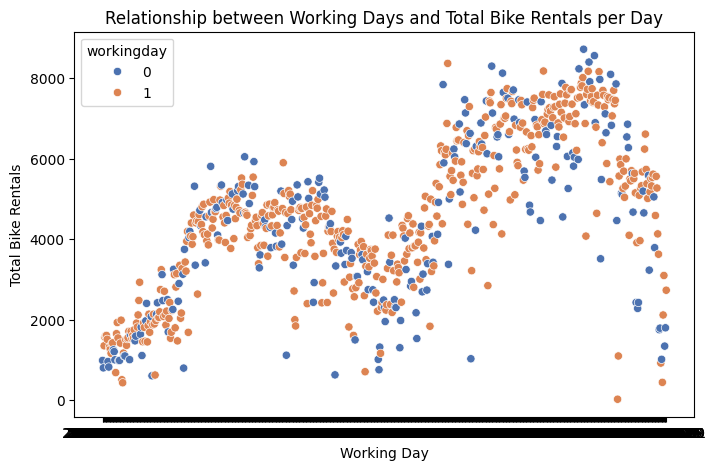

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df_cleaned['dteday'], y=day_df_cleaned['cnt'], hue=day_df_cleaned['workingday'], palette='deep')
plt.title("Relationship between Working Days and Total Bike Rentals per Day")
plt.xlabel("Working Day")
plt.ylabel("Total Bike Rentals")
plt.show()

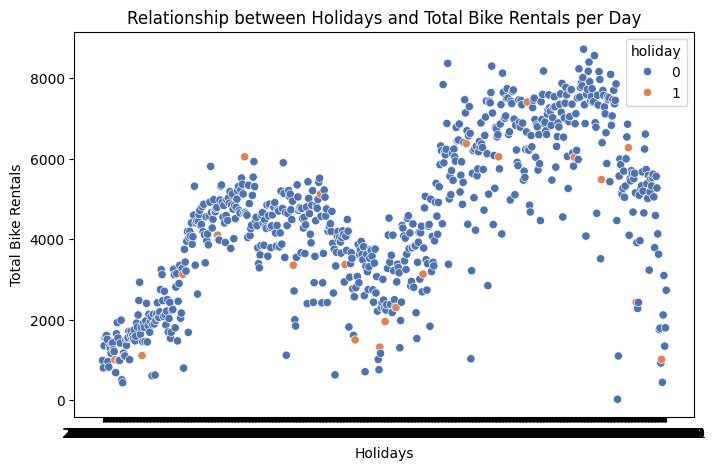

In [113]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df_cleaned['dteday'], y=day_df_cleaned['cnt'], hue=day_df_cleaned['holiday'], palette='deep')
plt.title("Relationship between Holidays and Total Bike Rentals per Day")
plt.xlabel("Holidays")
plt.ylabel("Total Bike Rentals")
plt.show()

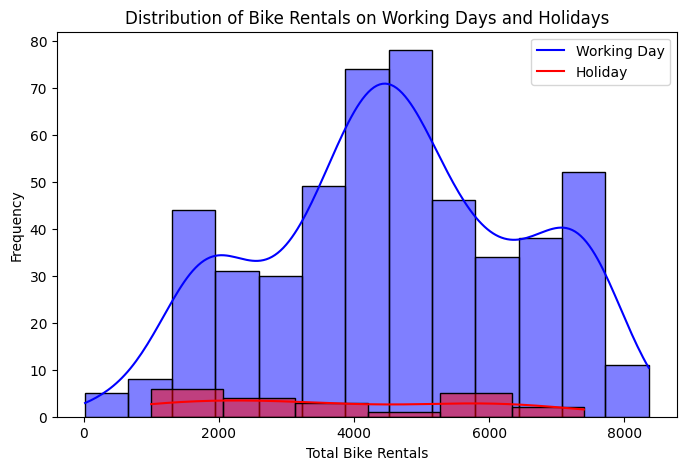

In [101]:
working_day = day_df_cleaned[day_df_cleaned['workingday'] == 1]['cnt']
holiday = day_df_cleaned[day_df_cleaned['holiday'] == 1]['cnt']

plt.figure(figsize=(8,5))
sns.histplot(working_day, color='blue', kde=True)
sns.histplot(holiday, color='red', kde=True)
plt.title("Distribution of Bike Rentals on Working Days and Holidays")
plt.xlabel("Total Bike Rentals")
plt.ylabel("Frequency")
plt.legend(['Working Day', 'Holiday'])
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?

In [114]:
day_df_cleaned.head(), day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

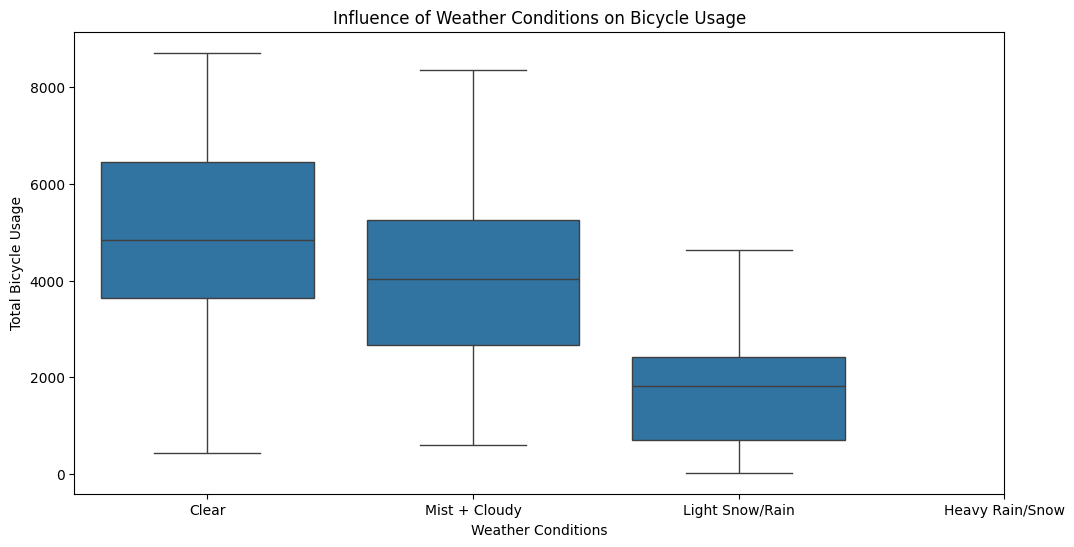

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Influence of Weather Conditions on Bicycle Usage')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Bicycle Usage')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

In [117]:
# day_df_cleaned.to_csv('data/day_cleaned.csv', index=False)

## Conclusion

### **Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?** 
Pada hari kerja, penyebaran data lebih luas dan ada beberapa puncak, yang menunjukkan variasi yang lebih besar dalam jumlah penyewaan sepeda. Sementara pada hari libur, penyebaran data lebih sempit dengan jumlah penyewaan sepeda yang lebih stabil di sekitar nilai rendah.
### **Bagaimana kondisi cuaca memengaruhi penggunaan sepeda?** 
Pada cuaca cerah, penggunaan sepeda paling tinggi dengan variasi yang lebih besar, sedangkan pada cuaca berkabut atau berawan, penggunaan sedikit lebih rendah namun masih cukup bervariasi. Kondisi hujan atau salju ringan mengakibatkan penurunan signifikan dalam penggunaan sepeda, dengan variasi yang lebih sempit dan median yang lebih rendah. Tidak ada data yang ditampilkan untuk hujan atau salju lebat, yang mengindikasikan bahwa penggunaan sepeda sangat rendah atau tidak ada dalam kondisi cuaca buruk tersebut.